# EE613 - Linear Regression II - Exercise 1 (Logistic Regression)

In [39]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import dot

#use 'inline' for plotting the figure inside the notebook, and 'qt' for pop-up plot
%matplotlib inline
np.set_printoptions(precision=4,suppress=True)

## Problem Definition 

#### In this exercise, we want to apply logistic regression to classify between two letters, $C_1$ and $C_2$, given the data $x$. The probability of belonging to the first class $C_1$ can be formulated as: 
$$P(C_1 | x) = \frac{1}{1 + exp(-A^\top x)} $$

### Generate Data 

In [28]:
ROOT = '../python_data/2Dletters/'

#take the first letter data
data = np.load(ROOT + 'U.npy')
data = data.transpose([0,2,1])
data = data[:,::5,:] #subsample to reduce the number of data points
num_data_1 = len(data)

#take the second letter data
data2 = np.load(ROOT + 'V.npy')
data2 = data2.transpose([0,2,1])
data2 = data2[:,::5,:] #subsample to reduce the number of data points
num_data_2 = len(data2)

#combine the data
data_full = np.concatenate((data,data2),axis=0)

#### Plot random sample from the data 

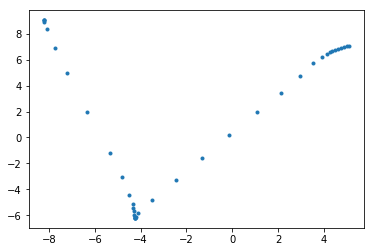

In [29]:
random_index = np.random.randint(len(data_full))
data_i = data_full[random_index]
plt.plot(data_i[:,0], data_i[:,1],'.')

#### Construct the input and output, and separate into training and test data 

In [31]:
from sklearn.model_selection import train_test_split

#the input is the letter trajectory data {x1,x2}, and the output is a binary variable {0,1}
N = data_full.shape[0]
data_full = data_full.reshape(N,-1) #concatenating x1 and x2 variables into a vector
X = np.concatenate([np.ones((N,1)), data_full], axis=1)
Y = np.concatenate([np.ones(num_data_1),np.zeros(num_data_2)])[:,None] #the output value for the first letter is 1, and 0 for the second letter

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)

*** 

### Question 1: 
Using $X_{train}$ and $Y_{train}$, obtain the logistic regression parameters $A$ by IRLS, and use that to predict the correct letters on $X_{test}$. Compare the prediction to the true value, $Y_{test}$, at different iterations of IRLS. You can look at demo_logistic_regression.ipynb for an example. (Note: chose an array of zeros as the initial value of $A$).   

### Question 2:
When constructing the input $X$ above, why do we need to add np.ones((N,1))?

*** 